### Decision Trees and Random Forests

#### Packages

In [1]:
import sys
import sklearn
import graphviz
import numpy as np
import pandas as pd
import matplotlib as mpl

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree

print('The Python version is {}.\n'.format(sys.version))
print('The Numpy version is {}.\n'.format(np.__version__))
print('The Pandas version is {}.\n'.format(pd.__version__))
print('The Matplotlib version is {}.\n'.format(mpl.__version__))
print('The Scikit-Learn version is {}.\n'.format(sklearn.__version__))

The Python version is 3.8.5 (default, Jul 28 2020, 12:59:40) 
[GCC 9.3.0].

The Numpy version is 1.19.1.

The Pandas version is 1.1.0.

The Matplotlib version is 3.3.3.

The Scikit-Learn version is 0.24.0.



### Decision Trees

Decision trees and the machine learning models that are based on them, in particular random forests and gradient boosted trees, are fundamentally different types of models than generalized linear models, such as logistic regression. GLMs are rooted in the theories of classical statistics, which have a long history. The mathematics behind linear regression were originally developed at the beginning of the 19th century, by Legendre and Gauss. Because of this, the normal distribution is also called the Gaussian.

Decision trees have an intuitive structure and mimic the way that logical decisions might be made by humans. Therefore, they are a highly interpretable type of mathematical model, which can be a particularly desirable property depending on the audience. 

Decision trees are able to capture non-linear effects of the features, as opposed to a linear relationship.

In general, it should be clear that in a tree with $n$ levels, where every node before the final level is split,
there will be $2n$ leaf nodes. This is important to bear in mind as the maximum depth is one of the hyperparameters that you can set for a decision tree classifier in scikit-learn

#### Growing a tree for the study case

Let us load the data and select the desired columns:

In [2]:
df = pd.read_csv('data/default_of_credit_card_clients_cleaned.csv')

features_response = df.columns.tolist()
to_remove = ['id', 'sex'] + ['pay_{}'.format(i) for i in range(2,7)] + features_response[-6:]

features_response = [feature for feature in features_response if feature not in to_remove]

Let us split the dataset into train and test sets:

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df[features_response].values,
                                                    df.default_payment_next_month.values,
                                                    test_size=0.2, random_state=24)

Now, let us instantiate the decision tree model:

In [4]:
dt = tree.DecisionTreeClassifier(max_depth=2)

dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Using the graphviz library, let display a graphical representation of the tree:

In [5]:
dot_data = tree.export_graphviz(dt, out_file=None, filled=True,
                                rounded=True, feature_names=features_response,
                                proportion=True, class_names=['Not Defaulted', 'Defaulted'])

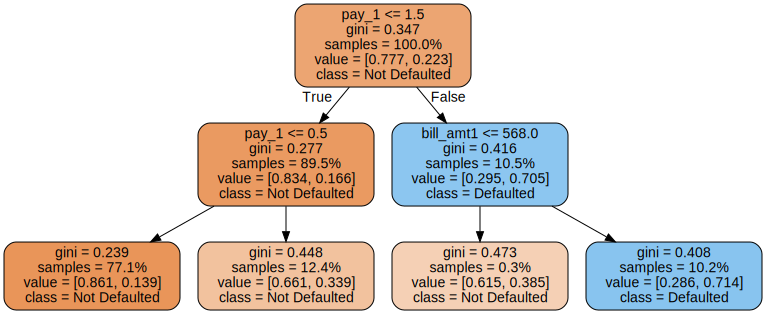

In [6]:
graph = graphviz.Source(dot_data)
graph

The training decision tree worked by starting with all the training samples in the initial node at the top of the tree, and then splited these into two groups based on a **threshold** in one of the features. The cut point was represented by a Boolean condition in the top **pay_1 <= 1.5** node. In the top node, there were all the samples ("samples = 100.0%"). Following the first split, 89.5% of the samples got sorted into the node on the left, while the remaining 10.5% went into the node on the right.

Let us confirm the proportions stated by the model:

In [7]:
(features_response.index('pay_1'),
 X_train.shape)

(4, (21331, 17))

In [8]:
sum(X_train[:, features_response.index('pay_1')] <= 1.5)/X_train.shape[0]

0.8946134733486475

Let us confirm the values line (the class proportion for the first node):

In [9]:
np.mean(y_train)

0.223102526838873

The class fractions were also colored: those with a higher proportion of the negative class than the positive class were orange, with darker orange signifying higher proportions, while those with a higher proportion of the positive class had a similar scheme using a blue color.

The line starting with "class" indicates how the decision tree made predictions from a given node, if that node were a leaf node. 

Decision trees for classification make predictions by determining which leaf node a sample will be sorted in to, given the values of the features, and then predicting the class of the majority of the training samples in that leaf node.